Notebook for exploring the relation between topological data analysis (TDA) features and behavioral data in the females from the training group. 

TDA data is constructed using the HCP_features.py file, which also used TDA code from Fernando. 

Behavioral data is constructed using the Make_cog_file_HCP Jupyer Notebook. 
Behavioral data is splitted into train and test group using Split_HCP_data_males Jupyter Notebook, or Split_HCP_data_females for females


# Import and order data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np

In [2]:
tda = pd.read_csv("/Users/minneschepers/Desktop/HCP/TDA_data/TDA_features_HCP_pvalued_train_males.csv")
bd = pd.read_csv("/Users/minneschepers/Desktop/HCP/Behavioral_Data/Males_train.csv")

In [3]:
bd.shape

(159, 41)

In [4]:
tda.shape

(158, 65)

In [5]:
# Only include subjects from bd which are also in tda
same = bd['subject'].isin(tda['Subject'])
print(same.value_counts())
bd.drop(bd[~same].index, inplace = True)
print(bd.shape)

True     158
False      1
Name: subject, dtype: int64
(158, 41)


In [6]:
# Only include subjects from tda which are also in bd
same = tda['Subject'].isin(bd['subject'])
print(same.value_counts())
tda.drop(tda[~same].index, inplace = True)
print(tda.shape)

True    158
Name: Subject, dtype: int64
(158, 65)


In [7]:
# Sort bd by subject and reset index before concatenating
bd.sort_values(by=['subject'], inplace=True)
bd.reset_index(drop=True, inplace=True)
print(bd['subject'])

0      HCA6010538
1      HCA6047359
2      HCA6054457
3      HCA6108050
4      HCA6111241
          ...    
153    HCA9865005
154    HCA9868920
155    HCA9882308
156    HCA9912391
157    HCA9947411
Name: subject, Length: 158, dtype: object


In [8]:
# Sort tda by subject and reset index before concatenating
tda.sort_values(by=['Subject'], inplace=True)
tda.reset_index(drop=True, inplace=True)
print(tda['Subject'])

0      HCA6010538
1      HCA6047359
2      HCA6054457
3      HCA6108050
4      HCA6111241
          ...    
153    HCA9865005
154    HCA9868920
155    HCA9882308
156    HCA9912391
157    HCA9947411
Name: Subject, Length: 158, dtype: object


In [9]:
# Concatenate bd and tda into df
print(bd.shape)
print(tda.shape)
df = pd.concat([bd, tda], axis=1)
print(df.shape)

(158, 41)
(158, 65)
(158, 106)


In [10]:
# Create EF (executive functioning column) as mean of flanker and dccs
df['EF_age'] = df[['flanker_age', 'dccs_age']].mean(axis=1)
df['EF_unadjusted'] = df[['flanker_unadjusted', 'dccs_unadjusted']].mean(axis=1)

# Order bd columns in lists
age_adjusted = [i for i in bd.columns if '_age' in i]
age_adjusted.append('EF_age')
age_adjusted.append('age_years')
unadjusted = [i for i in bd.columns if '_unadjusted' in i]
unadjusted.append('EF_unadjusted')
natper = [i for i in bd.columns if '_np' in i]
subject_information = ['subject',  'sex', 'age_months']
WM = ['lswmt_unadjusted', 'lswmt_age']
EF = ['dccs_unadjusted', 'dccs_age',
       'flanker_unadjusted', 'flanker_age',
      'EF_unadjusted', 'EF_age']

In [11]:
# Order tda columns in lists
tda_features = tda.columns[1:]

DMN_curvatures = [i for i in tda_features if 'DMN' in i if 'curv' in i]
FPN_curvatures = [i for i in tda_features if 'FPN' in i if 'curv' in i]
all_curvatures = [i for i in tda_features if 'all' in i if 'curv' in i]
p3_cliques = [i for i in tda_features if 'p3cliques' in i]
p4_cliques = [i for i in tda_features if 'p4cliques' in i]
global_features = [i for i in tda_features if i not in DMN_curvatures if i not in FPN_curvatures if i not in all_curvatures if i not in p3_cliques if i not in p4_cliques]

WM_age = ['lswmt_age']
EF_age = ['dccs_age', 'flanker_age', 'EF_age']
all_kur = [i for i in tda_features if 'kur' in i]
all_skew = [i for i in tda_features if 'skew' in i]
all_std = [i for i in tda_features if 'std' in i]
all_ent = [i for i in tda_features if 'curv_ent' in i]

---
# Create dataframe without nan values


In [12]:
to_include = age_adjusted + unadjusted

In [13]:
# Only include age_adjusted, and then add subject column
df_no_nan = df[to_include]
df_no_nan['subject'] = list(df['subject'])
df_no_nan['EF_unadjusted'] = list(df['EF_unadjusted'])
print(df_no_nan.shape)

(158, 26)


<ipython-input-13-3ffb2cdb13d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nan['subject'] = list(df['subject'])
<ipython-input-13-3ffb2cdb13d0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_nan['EF_unadjusted'] = list(df['EF_unadjusted'])


In [14]:
# Show number of non_nan_values per column
df_no_nan.count()

fluidcog_age                128
crystalcog_age              126
earlychildcog_age           127
totalcog_age                126
dccs_age                    128
flanker_age                 128
lswmt_age                   129
orrt_age                    128
pcps_age                    129
picseq_age                  129
pvt_age                     128
EF_age                      128
age_years                   157
fluidcog_unadjusted         125
crystalcog_unadjusted       125
earlychildcog_unadjusted    124
totalcog_unadjusted         124
dccs_unadjusted             126
flanker_unadjusted          126
lswmt_unadjusted            127
orrt_unadjusted             127
pcps_unadjusted             127
picseq_unadjusted           126
pvt_unadjusted              126
EF_unadjusted               126
subject                     158
dtype: int64

In [15]:
# Drop all nan values
df_no_nan = df_no_nan.dropna()

In [16]:
# Add tda data to df_no_nan
same = tda['Subject'].isin(df_no_nan['subject'])
tda.drop(tda[~same].index, inplace = True)

In [17]:
# Sort tda data and reset index
tda.sort_values(by=['Subject'], inplace=True)
tda.reset_index(drop=True, inplace=True)
# Sort df and reset index
df_no_nan.sort_values(by=['subject'], inplace=True)
df_no_nan.reset_index(drop=True, inplace=True)

# Merge dataframes
print(df_no_nan.shape)
print(tda.shape)
df_no_nan = pd.concat([df_no_nan, tda], axis=1)
print(df_no_nan.shape)

(122, 26)
(122, 65)
(122, 91)


In [18]:
df_no_nan.to_csv('/Users/minneschepers/Desktop/HCP/Data/Males_filtered_exp.csv', index=False)

# Data exploration

<AxesSubplot:>

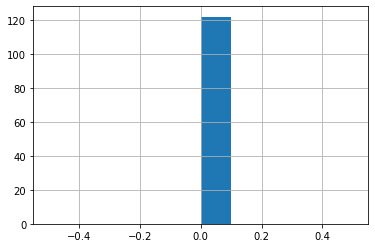

In [18]:
df_no_nan['triangles_sum'].hist()

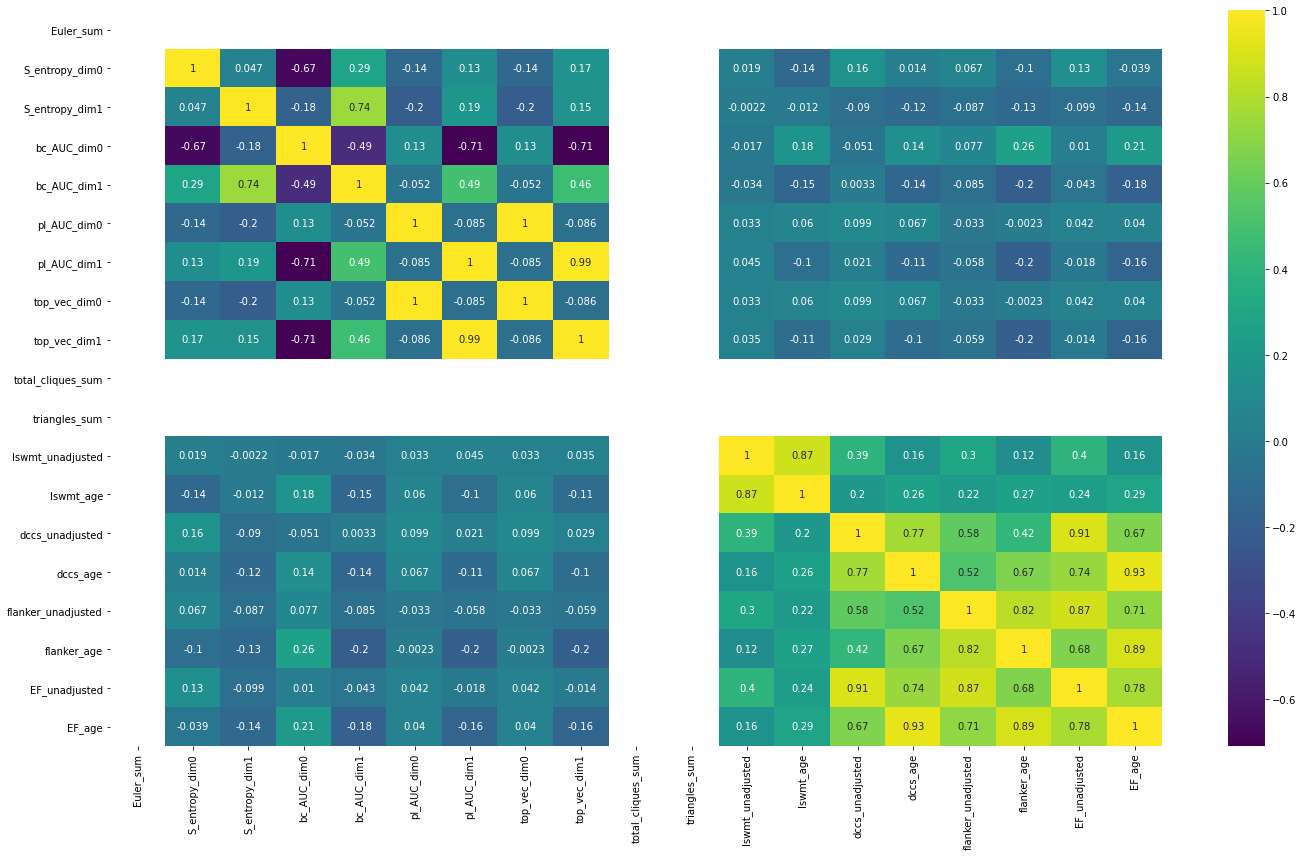

In [19]:
to_compare = global_features + WM + EF
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_no_nan[to_compare].corr(), annot=True, cmap='viridis')
plt.tight_layout()

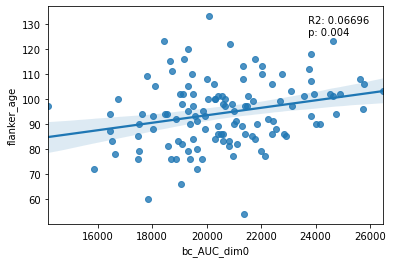

In [66]:
regplot('bc_AUC_dim0', 'flanker_age', df_no_nan)

<AxesSubplot:xlabel='bc_AUC_dim0', ylabel='flanker_age'>

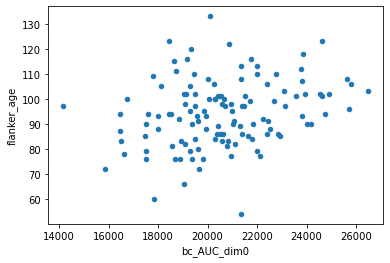

In [65]:
df_no_nan.plot.scatter(x='bc_AUC_dim0', y='flanker_age')

In [20]:
# to_compare = DMN_curvatures + WM + EF
# fig, ax = plt.subplots(figsize=(25,15))
# sns.heatmap(df_no_nan[to_compare].corr(), annot=True, cmap='viridis')
# plt.tight_layout()
# plt.savefig('/Users/minneschepers/Downloads/DMN_curvatures.png')

<AxesSubplot:>

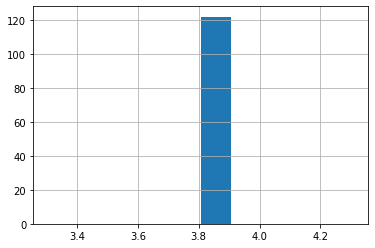

In [21]:
df_no_nan['curv_ent_FPN_0.005'].hist()

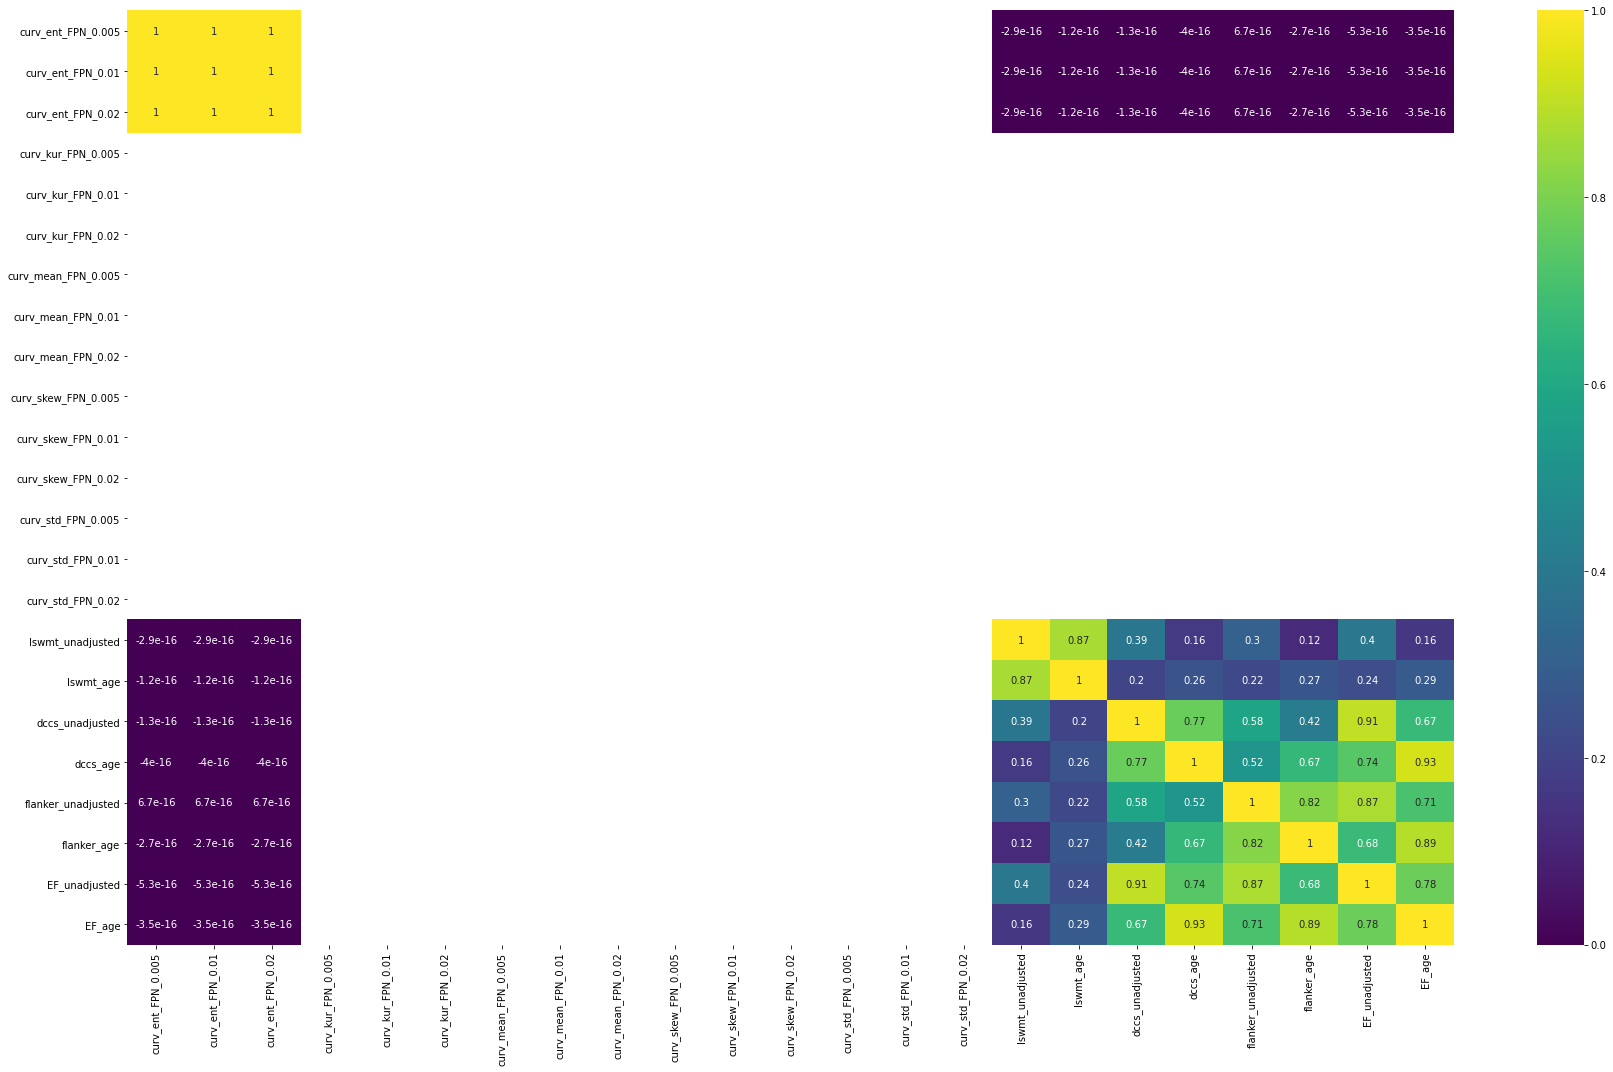

In [22]:
to_compare = FPN_curvatures + WM + EF
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(df_no_nan[to_compare].corr(), annot=True, cmap='viridis')
plt.tight_layout()
plt.savefig('/Users/minneschepers/Downloads/FPN_curvatures.png')

In [60]:
df_no_nan['curv_ent_all_0.005'].value_counts()

5.886104    122
Name: curv_ent_all_0.005, dtype: int64

In [62]:
df_no_nan['curv_ent_all_0.01'].value_counts()

5.886104    122
Name: curv_ent_all_0.01, dtype: int64

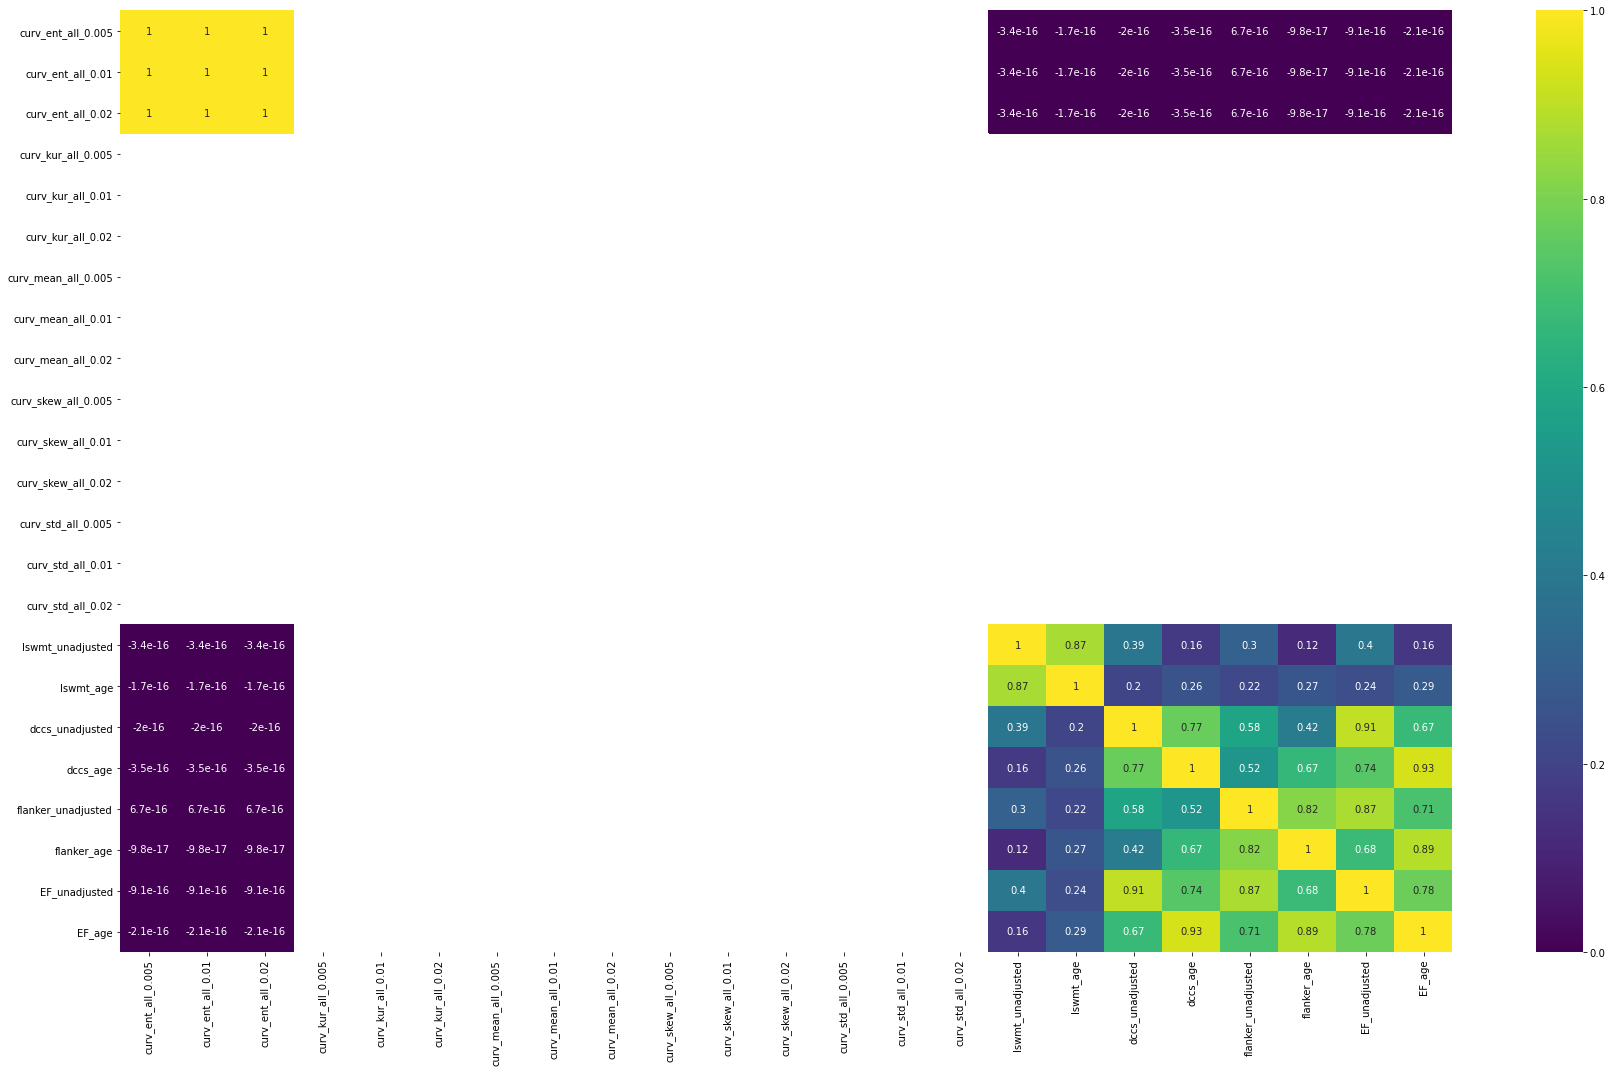

In [23]:
to_compare = all_curvatures + WM + EF
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(df_no_nan[to_compare].corr(), annot=True, cmap='viridis')
plt.tight_layout()
plt.savefig('/Users/minneschepers/Downloads/all_curvatures.png')

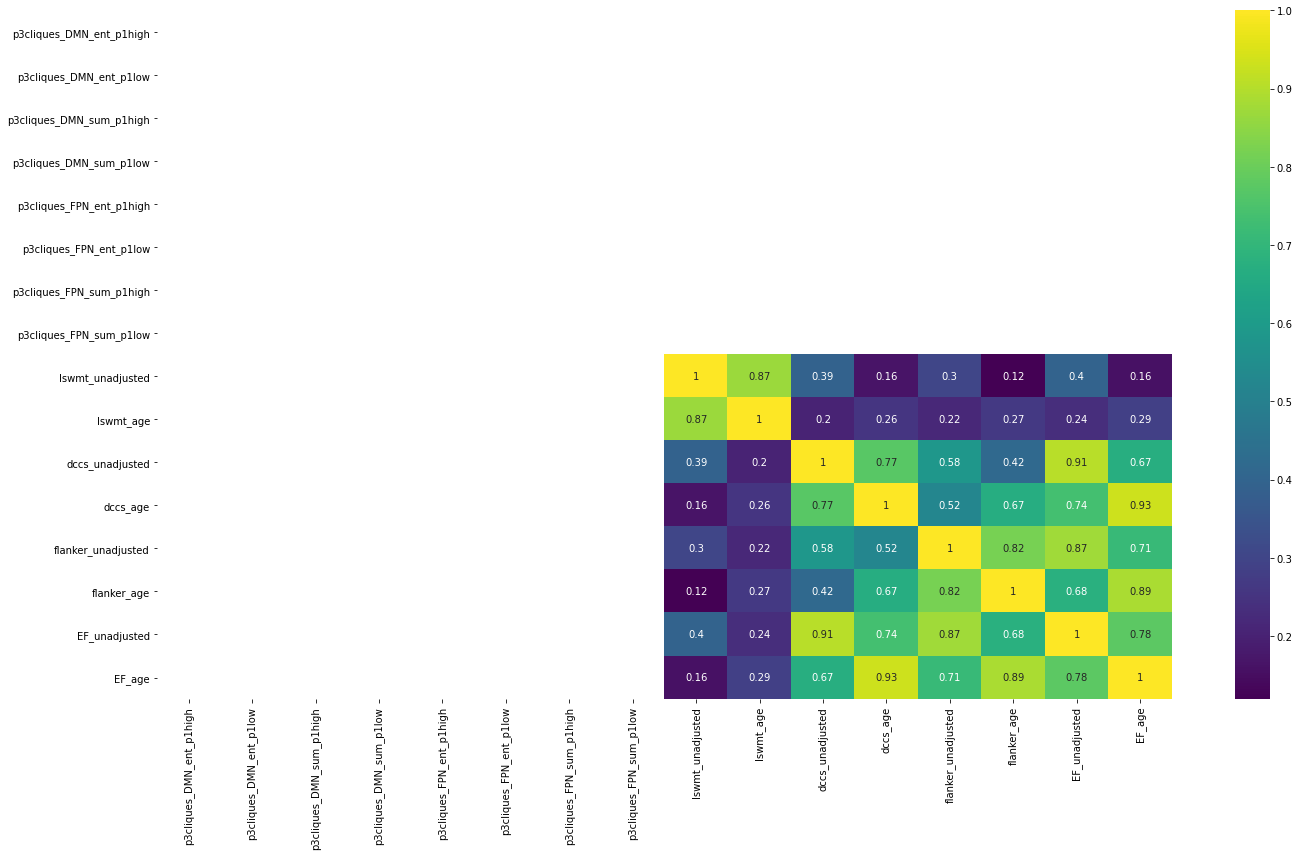

In [24]:
to_compare = p3_cliques + WM + EF
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df_no_nan[to_compare].corr(), annot=True, cmap='viridis')
plt.tight_layout()

### Define functions for data exploration:

In [26]:
def regplot(X_column, y_column, df):
    
    X = df[X_column]
    y = df[y_column]
    
    X2 = sm.add_constant(X)
    est = sm.OLS(y, X2)
    est2 = est.fit()
    p_value = round(est2.pvalues[1], 5)
    R2 = round(est2.rsquared, 5)

    sns.regplot(x=X, y=y)
    plt.figtext(0.72, 0.78, f' R2: {R2} \n p: {p_value}', fontsize=10)
    plt.xlabel(X_column)
    plt.ylabel(y_column)
    plt.show()

In [27]:
def z_scored_df(df, X_column, cut_off, print_zscores):
    
    z_scored = np.abs(stats.zscore(df[X_column]))
    if print_zscores == 1:
        print(z_scored)
    filtered = (z_scored < cut_off)#.all(axis=1)
    df_new = df[filtered]
    print(f'Shape old df: {df.shape}')
    print(f'Shape new df: {df_new.shape}')
    
    return df_new

In [28]:
def z_scored_regplot(x, y, dataframe, cut_off, print_zscores):
    
    X_column = x
    y = y
    df = dataframe
    
    regplot(X_column, y, z_scored_df(df, X_column, cut_off=cut_off, print_zscores=print_zscores))

In [29]:
def get_best_predictors(x, y, dataframe, n, zscore):
        
    # This function gets the n best predictors for a target and produces regression plots
    
    print(f'\n---------------- y = {y} ----------------\n')
    df = dataframe
    columns = []
    
    [columns.append(i) for i in x]
    columns.append(y)

    # Create correlation matrix
    corr = df[columns].corr()
    # Only include column with corr values with y-column, and exclude row with y (autocorrelation)
    # Absolutize to also get large negative correlation values
    corr = np.abs(corr.iloc[:-1,-1:])
    # Get n largest corr values
    corr = corr.nlargest(n, corr.columns)
    print(corr)
    # Save predictors to list
    best_predictors = corr.index.to_list()
    # Make for each predictor regression plot
    if zscore == 0:
        [regplot(predictor, y, df) for predictor in best_predictors]
    else:
        [z_scored_regplot(predictor, y, df, cut_off=zscore, print_zscores=0) for predictor in best_predictors]
    print(best_predictors)
    
# get_best_predictors(global_features, 'fluidcog_age', df_no_nan, n=3, zscore=0)

### Differences between outcomes adjusted by age and unadjusted by age

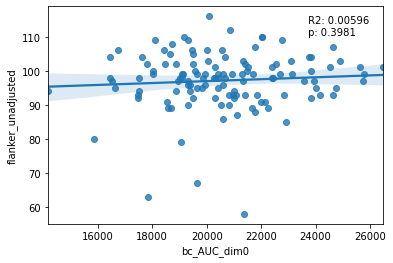

In [30]:
regplot('bc_AUC_dim0', 'flanker_unadjusted', df=df_no_nan)

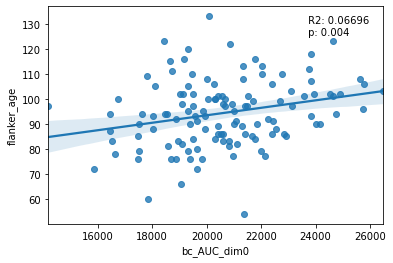

In [31]:
regplot('bc_AUC_dim0', 'flanker_age', df=df_no_nan)

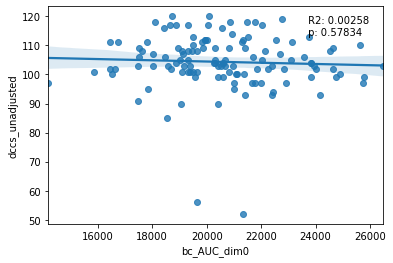

In [32]:
regplot('bc_AUC_dim0', 'dccs_unadjusted', df=df_no_nan)

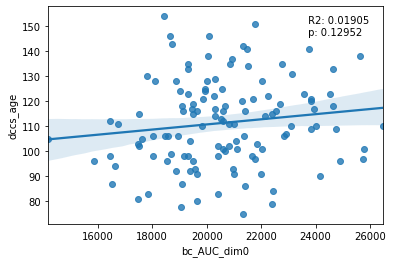

In [33]:
regplot('bc_AUC_dim0', 'dccs_age', df=df_no_nan)

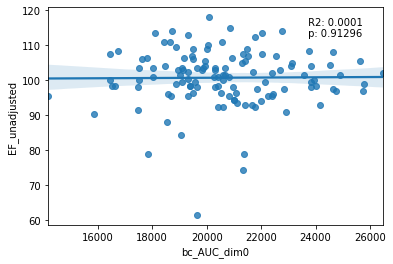

In [34]:
regplot('bc_AUC_dim0', 'EF_unadjusted', df=df_no_nan)

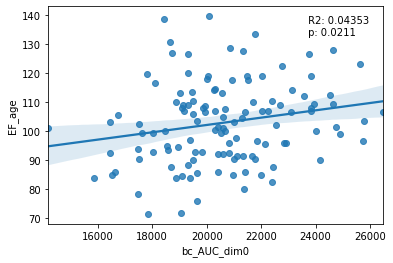

In [35]:
regplot('bc_AUC_dim0', 'EF_age', df=df_no_nan)

----
### Data exploration per outcome:

Age


---------------- y = age_years ----------------

                age_years
bc_AUC_dim0      0.395410
S_entropy_dim0   0.340942
pl_AUC_dim1      0.304799
top_vec_dim1     0.303530
bc_AUC_dim1      0.202933
Shape old df: (122, 91)
Shape new df: (122, 91)


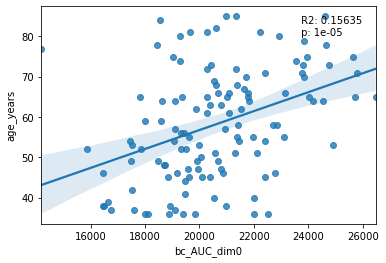

Shape old df: (122, 91)
Shape new df: (122, 91)


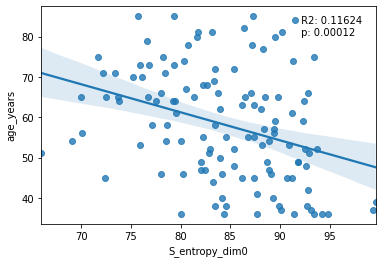

Shape old df: (122, 91)
Shape new df: (122, 91)


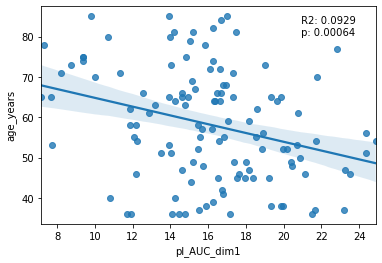

Shape old df: (122, 91)
Shape new df: (122, 91)


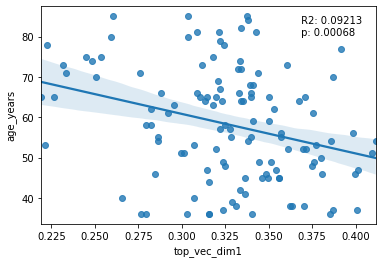

Shape old df: (122, 91)
Shape new df: (121, 91)


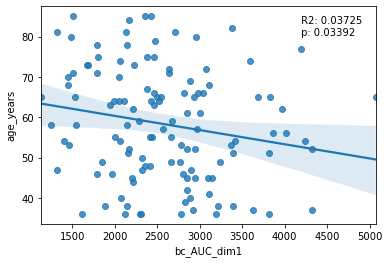

['bc_AUC_dim0', 'S_entropy_dim0', 'pl_AUC_dim1', 'top_vec_dim1', 'bc_AUC_dim1']


In [36]:
selected_features = list(tda_features)
to_remove = []

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features ]

get_best_predictors(selected_features, 'age_years', df_no_nan, n=5, zscore=3)

fluidcog_age
- Flanker, Dimensional Change Card Sort, Picture Sequence Memory, List Sorting, Pattern Comparison test

Results:



---------------- y = fluidcog_age ----------------

                fluidcog_age
bc_AUC_dim0         0.203015
pl_AUC_dim1         0.193612
bc_AUC_dim1         0.186787
top_vec_dim1        0.186161
S_entropy_dim1      0.116051
Shape old df: (122, 91)
Shape new df: (122, 91)


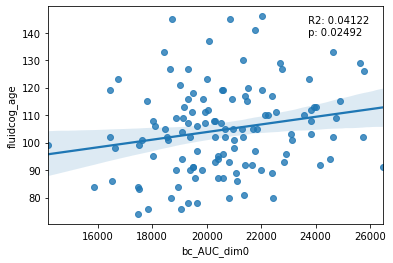

Shape old df: (122, 91)
Shape new df: (122, 91)


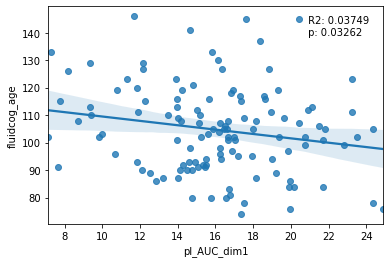

Shape old df: (122, 91)
Shape new df: (121, 91)


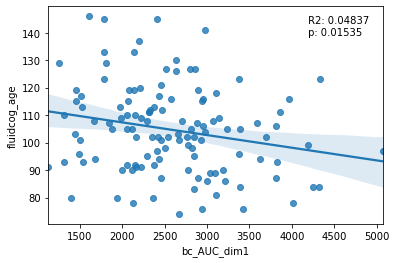

Shape old df: (122, 91)
Shape new df: (122, 91)


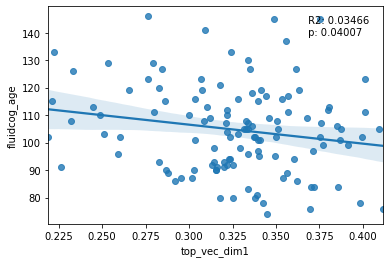

Shape old df: (122, 91)
Shape new df: (120, 91)


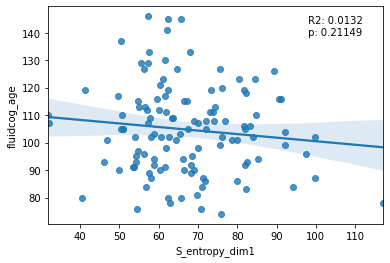

['bc_AUC_dim0', 'pl_AUC_dim1', 'bc_AUC_dim1', 'top_vec_dim1', 'S_entropy_dim1']


In [37]:
selected_features = list(tda_features)
to_remove = []

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features ]

get_best_predictors(selected_features, 'fluidcog_age', df_no_nan, n=5, zscore=3)

---

crystalcog_age
- Oral Reading Recognition Test and Picture Vocabulary Test

Results:



---------------- y = crystalcog_age ----------------

                crystalcog_age
bc_AUC_dim0           0.238693
top_vec_dim1          0.132513
pl_AUC_dim1           0.131283
S_entropy_dim0        0.092122
bc_AUC_dim1           0.078023
Shape old df: (122, 91)
Shape new df: (122, 91)


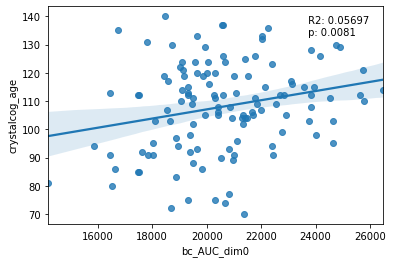

Shape old df: (122, 91)
Shape new df: (122, 91)


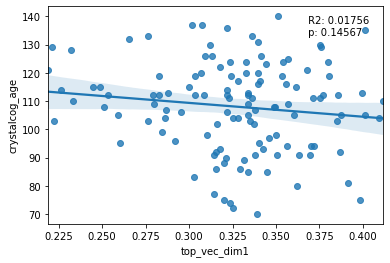

Shape old df: (122, 91)
Shape new df: (122, 91)


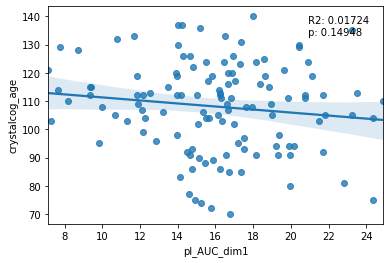

Shape old df: (122, 91)
Shape new df: (122, 91)


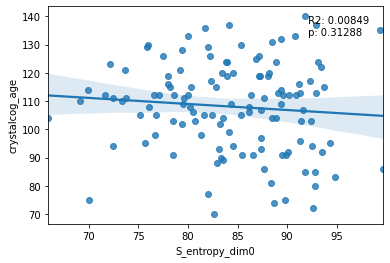

Shape old df: (122, 91)
Shape new df: (121, 91)


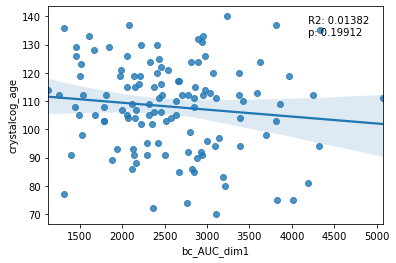

['bc_AUC_dim0', 'top_vec_dim1', 'pl_AUC_dim1', 'S_entropy_dim0', 'bc_AUC_dim1']


In [38]:
selected_features = list(tda_features)
to_remove = []

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features ]

get_best_predictors(selected_features, 'crystalcog_age', df_no_nan, n=5, zscore=3)

---

earlychildcog_age


Results:



---------------- y = earlychildcog_age ----------------

                earlychildcog_age
bc_AUC_dim0              0.244808
pl_AUC_dim1              0.173311
top_vec_dim1             0.165662
bc_AUC_dim1              0.163502
S_entropy_dim1           0.077792
Shape old df: (122, 91)
Shape new df: (122, 91)


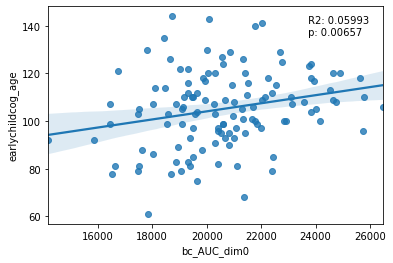

Shape old df: (122, 91)
Shape new df: (122, 91)


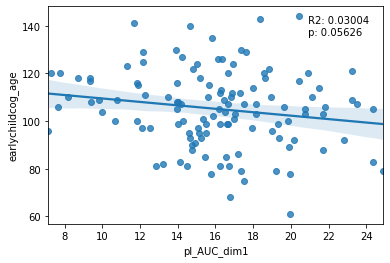

Shape old df: (122, 91)
Shape new df: (122, 91)


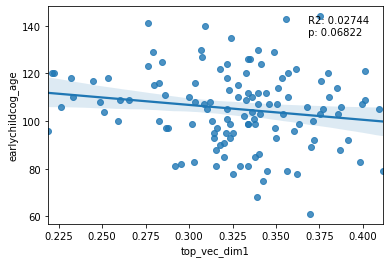

Shape old df: (122, 91)
Shape new df: (121, 91)


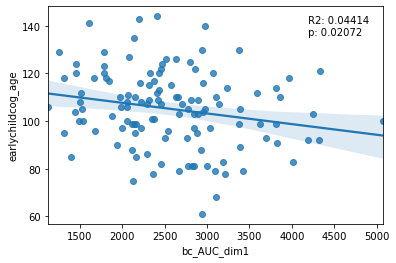

Shape old df: (122, 91)
Shape new df: (120, 91)


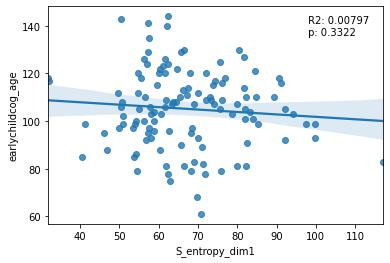

['bc_AUC_dim0', 'pl_AUC_dim1', 'top_vec_dim1', 'bc_AUC_dim1', 'S_entropy_dim1']


In [39]:
selected_features = list(tda_features)
to_remove = []

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features ]

get_best_predictors(selected_features, 'earlychildcog_age', df_no_nan, n=5, zscore=3)

---

totalcog_age

Results:



---------------- y = totalcog_age ----------------

                totalcog_age
bc_AUC_dim0         0.256802
pl_AUC_dim1         0.186555
top_vec_dim1        0.182769
bc_AUC_dim1         0.150240
S_entropy_dim1      0.064515
Shape old df: (122, 91)
Shape new df: (122, 91)


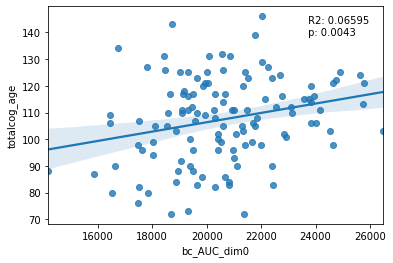

Shape old df: (122, 91)
Shape new df: (122, 91)


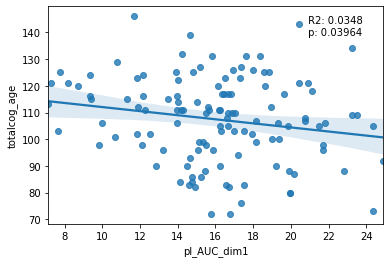

Shape old df: (122, 91)
Shape new df: (122, 91)


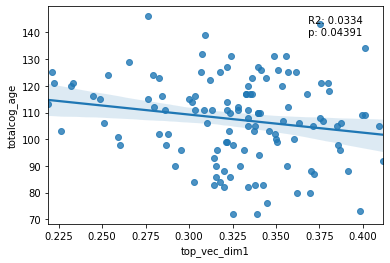

Shape old df: (122, 91)
Shape new df: (121, 91)


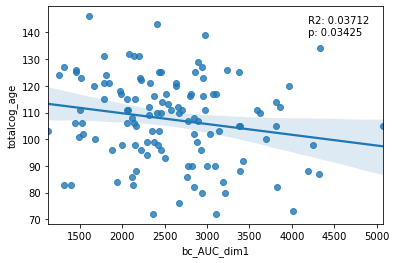

Shape old df: (122, 91)
Shape new df: (120, 91)


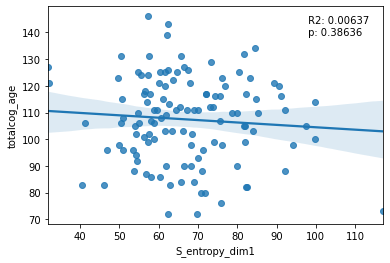

['bc_AUC_dim0', 'pl_AUC_dim1', 'top_vec_dim1', 'bc_AUC_dim1', 'S_entropy_dim1']


In [40]:
selected_features = list(tda_features)
to_remove = []

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features ]

get_best_predictors(selected_features, 'totalcog_age', df_no_nan, n=5, zscore=3)

----

dccs_age:
- Dimensional change card sort
- Measures Executive functioning / cognitive flexibility

Results:



---------------- y = dccs_age ----------------

                dccs_age
bc_AUC_dim1     0.141888
bc_AUC_dim0     0.138015
S_entropy_dim1  0.124116
pl_AUC_dim1     0.114860
top_vec_dim1    0.101400
Shape old df: (122, 91)
Shape new df: (121, 91)


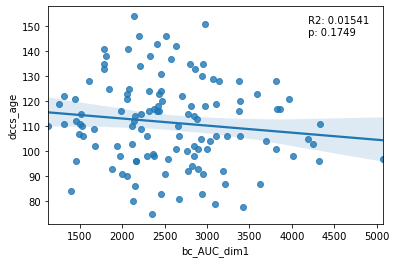

Shape old df: (122, 91)
Shape new df: (122, 91)


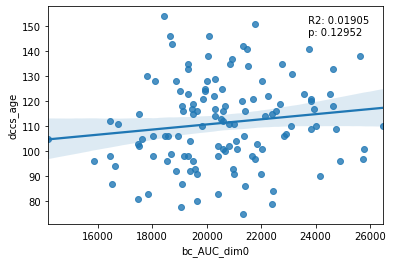

Shape old df: (122, 91)
Shape new df: (120, 91)


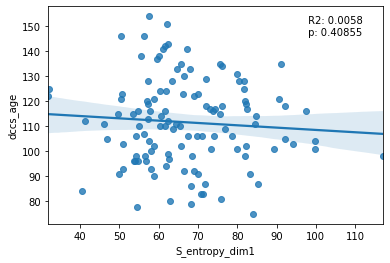

Shape old df: (122, 91)
Shape new df: (122, 91)


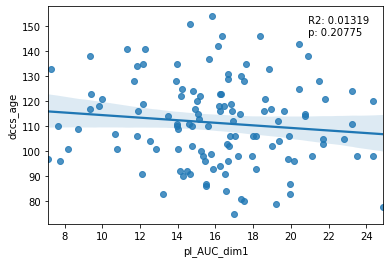

Shape old df: (122, 91)
Shape new df: (122, 91)


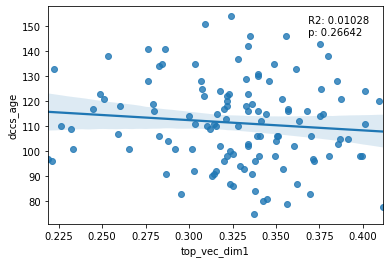

['bc_AUC_dim1', 'bc_AUC_dim0', 'S_entropy_dim1', 'pl_AUC_dim1', 'top_vec_dim1']


In [41]:
selected_features = list(tda_features)
to_remove = []

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features ]

get_best_predictors(selected_features, 'dccs_age', df_no_nan, n=5, zscore=3)

----

flanker_age:
- Flanker task
- Measures Executive Function/Inhibition

Results:



---------------- y = flanker_age ----------------

              flanker_age
bc_AUC_dim0      0.258773
bc_AUC_dim1      0.202596
top_vec_dim1     0.196415
pl_AUC_dim1      0.195812
Shape old df: (122, 91)
Shape new df: (122, 91)


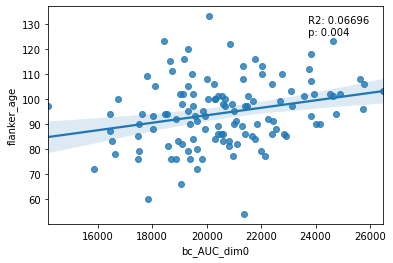

Shape old df: (122, 91)
Shape new df: (121, 91)


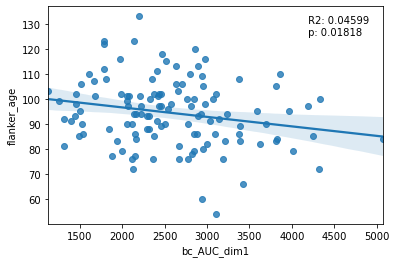

Shape old df: (122, 91)
Shape new df: (122, 91)


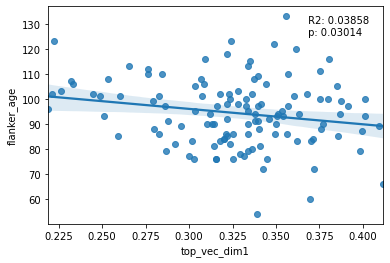

Shape old df: (122, 91)
Shape new df: (122, 91)


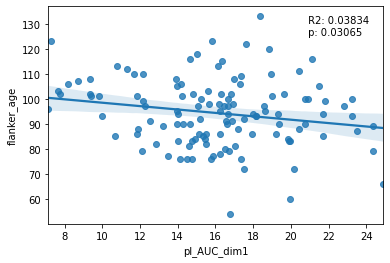

['bc_AUC_dim0', 'bc_AUC_dim1', 'top_vec_dim1', 'pl_AUC_dim1']


In [42]:
selected_features = list(tda_features)
to_remove = []

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features ]

get_best_predictors(selected_features, 'flanker_age', df_no_nan, n=4, zscore=3)

---

EF_age

- The mean of the age corrected scores for flanker and dccs (dimensional change card sort)

Results:



---------------- y = EF_age ----------------

                  EF_age
bc_AUC_dim0     0.208636
bc_AUC_dim1     0.184169
pl_AUC_dim1     0.164290
top_vec_dim1    0.156294
S_entropy_dim1  0.138006
Shape old df: (122, 91)
Shape new df: (122, 91)


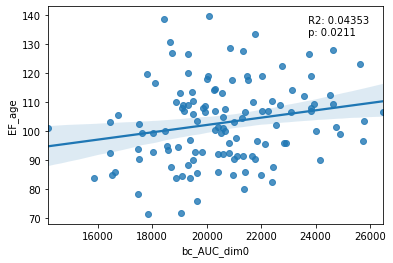

Shape old df: (122, 91)
Shape new df: (121, 91)


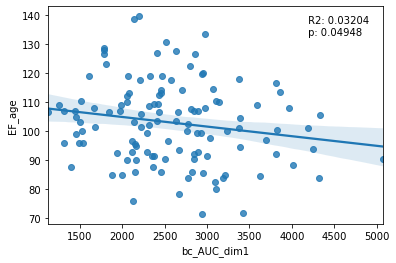

Shape old df: (122, 91)
Shape new df: (122, 91)


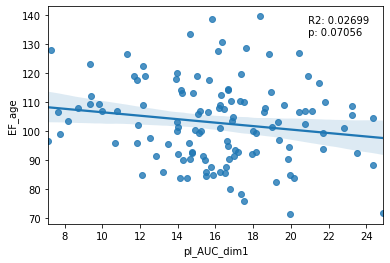

Shape old df: (122, 91)
Shape new df: (122, 91)


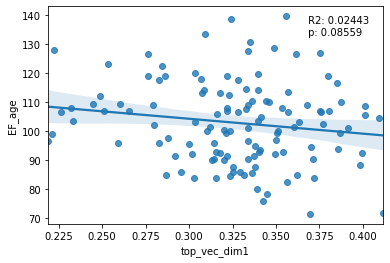

Shape old df: (122, 91)
Shape new df: (120, 91)


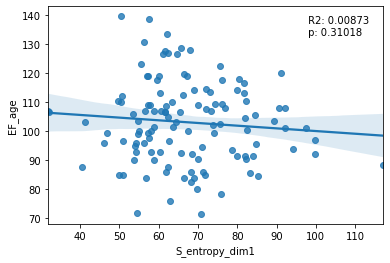

['bc_AUC_dim0', 'bc_AUC_dim1', 'pl_AUC_dim1', 'top_vec_dim1', 'S_entropy_dim1']


In [43]:
selected_features = list(tda_features)
to_remove = []

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features ]

get_best_predictors(selected_features, 'EF_age', df_no_nan, n=5, zscore=3)

----

lswmt_age
- List sorting task
- Measures working Memory

Results:



---------------- y = lswmt_age ----------------

             lswmt_age
bc_AUC_dim0   0.175981
bc_AUC_dim1   0.145816
Shape old df: (122, 91)
Shape new df: (122, 91)


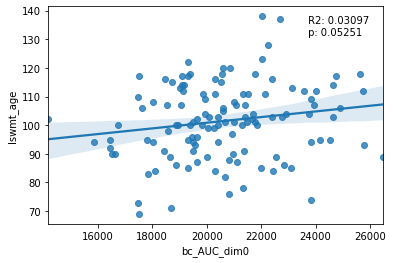

Shape old df: (122, 91)
Shape new df: (121, 91)


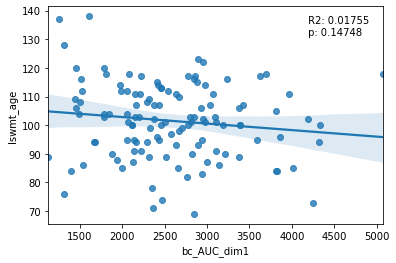

['bc_AUC_dim0', 'bc_AUC_dim1']


In [44]:
selected_features = list(tda_features)
to_remove = []

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features ]

get_best_predictors(selected_features, 'lswmt_age', df_no_nan, n=2, zscore=3)

----

orrt_age
- Oral Reading Recognition
- Measures language and reading decoding

Results:



---------------- y = orrt_age ----------------

                orrt_age
bc_AUC_dim0     0.072108
S_entropy_dim1  0.041782
bc_AUC_dim1     0.040798
pl_AUC_dim0     0.029589
Shape old df: (122, 91)
Shape new df: (122, 91)


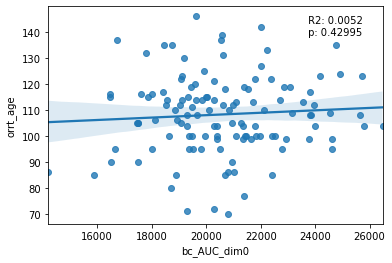

Shape old df: (122, 91)
Shape new df: (120, 91)


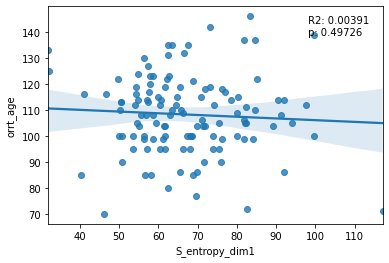

Shape old df: (122, 91)
Shape new df: (121, 91)


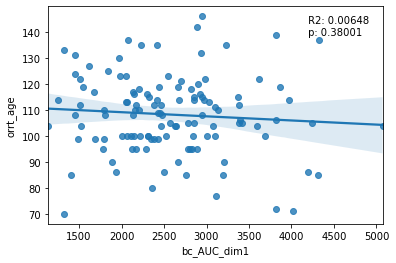

Shape old df: (122, 91)
Shape new df: (120, 91)


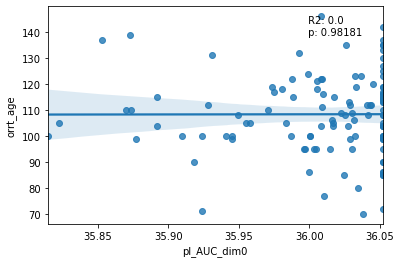

['bc_AUC_dim0', 'S_entropy_dim1', 'bc_AUC_dim1', 'pl_AUC_dim0']


In [45]:
selected_features = list(tda_features)
to_remove = []

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features ]

get_best_predictors(selected_features, 'orrt_age', df_no_nan, n=4, zscore=3)

PCPS_age:
- Pattern completion Processing Speed
- Measures processing speed

Results:



---------------- y = pcps_age ----------------

              pcps_age
pl_AUC_dim1   0.184627
top_vec_dim1  0.176477
bc_AUC_dim0   0.108097
Shape old df: (122, 91)
Shape new df: (122, 91)


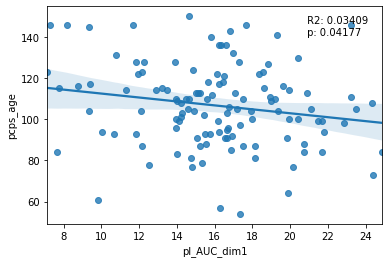

Shape old df: (122, 91)
Shape new df: (122, 91)


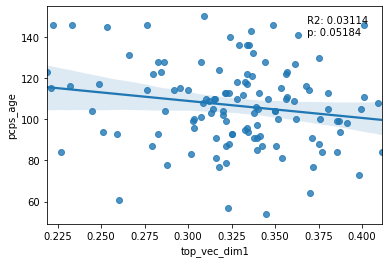

Shape old df: (122, 91)
Shape new df: (122, 91)


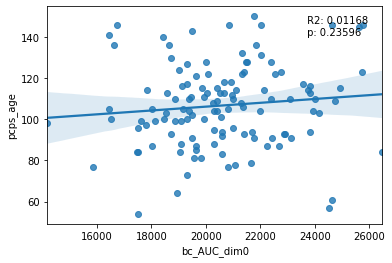

['pl_AUC_dim1', 'top_vec_dim1', 'bc_AUC_dim0']


In [46]:
selected_features = list(tda_features)
to_remove = []

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features ]

get_best_predictors(selected_features, 'pcps_age', df_no_nan, n=3, zscore=3)

----

Picseq_age
- Picture sequence memory
- Measures episodic memory

Results:



---------------- y = picseq_age ----------------

              picseq_age
top_vec_dim0    0.100233
pl_AUC_dim0     0.100233
Shape old df: (122, 91)
Shape new df: (120, 91)


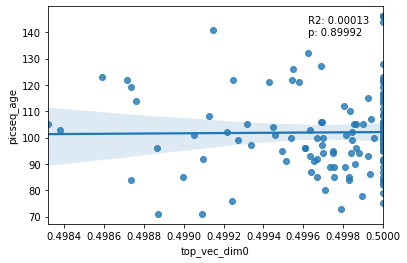

Shape old df: (122, 91)
Shape new df: (120, 91)


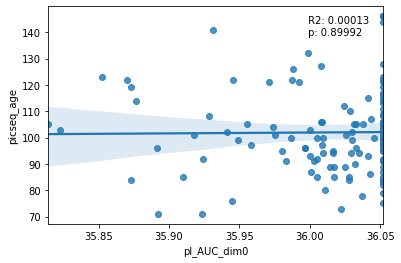

['top_vec_dim0', 'pl_AUC_dim0']


In [47]:
selected_features = list(tda_features)
to_remove = []

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features ]

get_best_predictors(selected_features, 'picseq_age', df_no_nan, n=2, zscore=3)

----

pvt_age:
- Picture Vocabulary task
- measures language/vocabulary comprehension

Results:



---------------- y = pvt_age ----------------

                 pvt_age
bc_AUC_dim0     0.334241
top_vec_dim1    0.197239
pl_AUC_dim1     0.194336
S_entropy_dim0  0.177868
bc_AUC_dim1     0.089808
pl_AUC_dim0     0.041298
top_vec_dim0    0.041298
S_entropy_dim1  0.040185
Shape old df: (122, 91)
Shape new df: (122, 91)


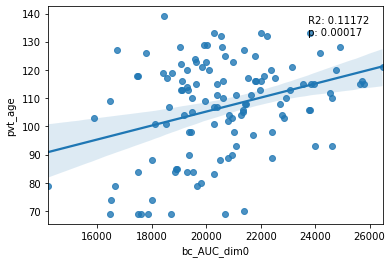

Shape old df: (122, 91)
Shape new df: (122, 91)


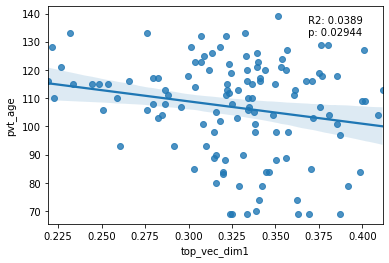

Shape old df: (122, 91)
Shape new df: (122, 91)


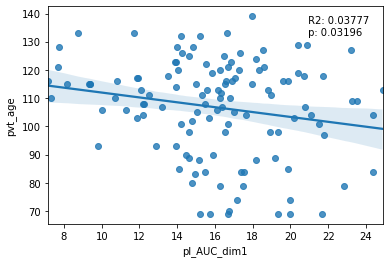

Shape old df: (122, 91)
Shape new df: (122, 91)


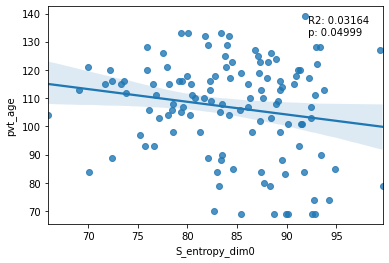

Shape old df: (122, 91)
Shape new df: (121, 91)


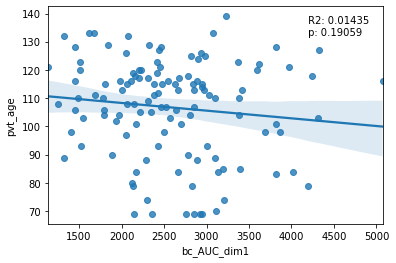

Shape old df: (122, 91)
Shape new df: (120, 91)


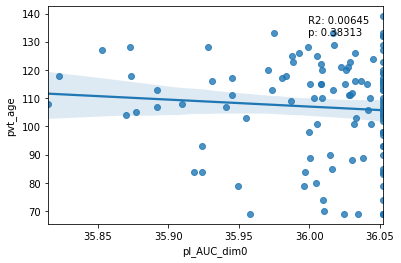

Shape old df: (122, 91)
Shape new df: (120, 91)


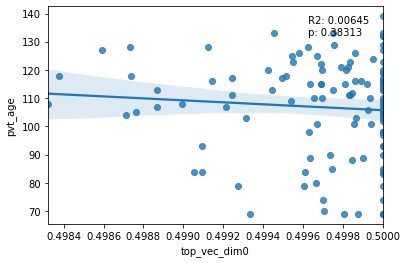

Shape old df: (122, 91)
Shape new df: (120, 91)


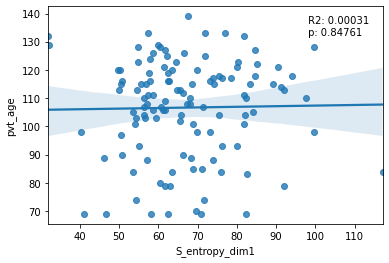

['bc_AUC_dim0', 'top_vec_dim1', 'pl_AUC_dim1', 'S_entropy_dim0', 'bc_AUC_dim1', 'pl_AUC_dim0', 'top_vec_dim0', 'S_entropy_dim1']


In [48]:
selected_features = list(tda_features)
to_remove = []

# [selected_features.remove(i) for i in all_kur]
# [selected_features.remove(i) for i in all_skew]
# [selected_features.remove(i) for i in all_std]
# [selected_features.remove(i) for i in all_ent]

[selected_features.remove(i) for i in to_remove if i in selected_features ]

get_best_predictors(selected_features, 'pvt_age', df_no_nan, n=8, zscore=3)